# Final Project Report: Is age of a player a good predictor for total played hours?
Group 007-2 Sohan Sadeque, Io Santiago, Maggie Tu, Fangfei Zhu

### Introduction:
PLAICraft is a project run by the PLAI (Pacific Laboratory for Artificial Intelligence) group at UBC’s Computer Science Department. Through this project, participants are able to play *Minecraft* for free on their browser on a shared server world where data such as audio, key presses, mouse inputs, and video footage is collected from players to train an Artificial Intelligence model. 
Our group first chose a broad question that we wanted to answer using datasets from this project. We ended up choosing: <br>

**Which ‘kinds’ of players are most likely to contribute a large amount of data?** <br>

To answer this broad question, we had to narrow it down and make it more specific. We decided that we can use ‘total played hours’ as a metric for the amount of data contributed and that age would be an interesting variable to correlate it with. Therefore, this report will focus on answering the following specific question: <br>

**Can age predict the total played hours for participants?** <br>

To answer this question, we were provided with two datasets: ‘players.csv’ and ‘sessions.csv’. <br>
The players.csv dataset includes data on the PLAICraft players themselves, totalling 196 observations and 7 variables including: <br>
<ol>
    <li>
        experience: The player’s prior experience with *Minecraft*
    </li>
    <li>
        subscribe: Whether the player is subscribed to the PLAICraft mailing list
    </li>
    <li>
        hashedEmail: The player’s encrypted email
    </li>
    <li>
        played_hours: The player’s total hours on the PLAICraft server
    </li>
    <li>
        name: The player’s first name
    </li>
    <li>
        gender: The player’s gender
    </li>
    <li>
        Age: The player’s age
    </li>
</ol>
The second dataset, sessions.csv, includes data on PLAICraft sessions. It totals 1,535 observations, each representing an individual player’s play session on the server. The dataset includes 5 variables:
<ol>
    <li>
        hashedEmail: The player’s encrypted email
    </li>
    <li>
        start_time: The play session’s start time including date, month, year, and time in 24-hour clock format
    </li>
    <li>
        end_time: The play session’s end time including date, month, year, and time in 24-hour clock format
    </li>
    <li>
        original_start_time: The play session’s start time in a different format.
    </li>
    <li>
        original_end_time: The play session’s end time in a different format.
    </li>
</ol>
Our methods will focus on using the <b>players.csv</b> dataset to answer our question.

### Methods & Results:

#### loads data 

In [3]:
library(tidyverse)
library(repr)
library(ggplot2)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
players <- read_csv("https://raw.githubusercontent.com/maggiettu/dsci100-group-project/refs/heads/main/players.csv")
players
summary(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

### Methods & Results:

For predicting players' play hours based on their age, we only need two variables: "played_hours" and "Age". Therefore, we select these two columns and name the resulting dataset "players_select" for further analysis.

In [14]:
players_select <- players |>
        select(played_hours,Age)
players_select

played_hours,Age
<dbl>,<dbl>
30.3,9
3.8,17
0.0,17
⋮,⋮
0.0,17
2.3,17
0.2,NA


Players_clean for dropping the missing value (N/A) appears in the age column. Then we use the selected and cleaned dataset to calculate the mean played hours and mean age of the dataset.

In [15]:
players_clean <- players_select |>
rename(age = Age) |>
drop_na()

In [16]:
players_mean <- players_clean |>
        summarize(
            mean_played_hours = mean(played_hours),
            mean_age = mean(age, na.rm = TRUE))

players_mean

mean_played_hours,mean_age
<dbl>,<dbl>
5.904639,20.52062


### Summary Data

| Maximum played hours | Minimum played hours|Mean played hours|
|:--------:| :-------: | :-------: |
| 223.100 |  0.000  |5.846| 

|Maximum Age| Minimum Age| Mean Age|
|:--------:| :-------: | :-------: |
|50.00|8.00|20.52|


### Visualization of the dataset

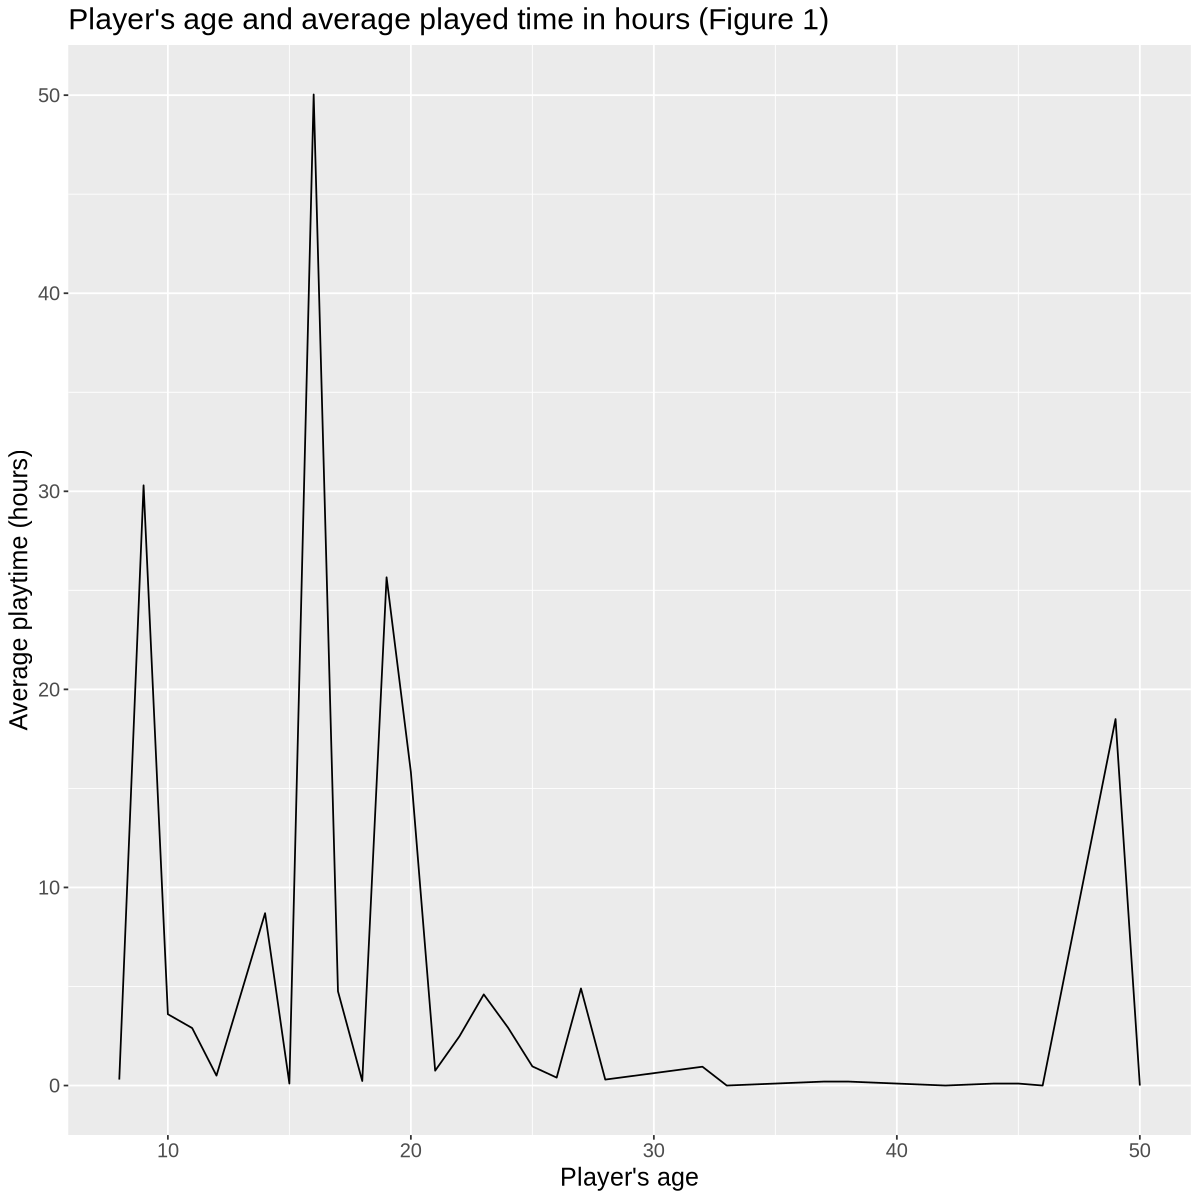

In [32]:
average_playtimes <- players_clean |>
    group_by(age) |>
    summarize(
        average_play = mean(played_hours)
    )
players_plot <- average_playtimes |>
    ggplot(aes(x = age ,y = average_play)) +
    geom_line()+
    labs(x = "Player's age",y = "Average playtime (hours)") +
    ggtitle("Player's age and average played time in hours (Figure 1)")+
    theme(text = element_text(size = 15))
players_plot

From the "Player’s Age and Average Play Time (in Hours)" plot, we use a line graph to illustrate the trend between players' ages and their average play time. The data indicates that players aged between 15 and 20 exhibit higher engagement in the game, with a peak of approximately 50 hours around the age of 16. The majority of players fall within the 8 to 20 age range, though there is also a smaller peak around the age of 47. In contrast, individuals aged 30 to 45 display significantly lower play hours. Overall, the plot suggests that age is a key factor influencing players' gaming activity.

### Data Analysis

In [8]:
players_mean <- players_clean |>
        summarize(
            mean_played_hours = mean(played_hours),
            mean_age = mean (age, na.rm = TRUE))

players_mean


mean_played_hours,mean_age
<dbl>,<dbl>
5.904639,20.52062


The initial_split function divides the original dataset into training and testing sets, with 50% of the data designated for training. Then we choose the k-nn regression model to estimate total played hours using age as the predictor variable. We create a recipe for preprocessing, which is also used to find the best k-neighbour number.

In [10]:
## split data
players_split <- initial_split(players_clean, prop = 0.5, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

## make model
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors =  tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

## make recipe
players_recipe <- recipe(played_hours ~ age, data = players_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())


We apply 5-fold cross-validation to the training data using the vfold_cv function. This function automatically splits the training data into 5 folds and ensures that both the training and validation subsets maintain the correct proportions of each category.

In [11]:
## 5 fold cross validation
set.seed(1234)

players_vfold <- vfold_cv(players_training, v = 5, strata = played_hours)

players_workflow <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec)


Then we run cross-validation over a grid of neighbor values ranging from 1 to 10. It will return the estimated RMSPE for each value of K and standard error.

In [12]:
## calculate rmse 
set.seed(2019)

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))


players_results <- players_workflow |>
  tune_grid(resamples = players_vfold, grid = gridvals) |>
  collect_metrics()

players_results


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,23.56457621,5,11.31618441,Preprocessor1_Model01
1,rsq,standard,0.08443645,5,0.07116293,Preprocessor1_Model01
2,rmse,standard,29.94338124,5,15.82930727,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,rsq,standard,0.04273031,5,0.028221405,Preprocessor1_Model09
10,rmse,standard,24.44166895,5,11.339768052,Preprocessor1_Model10
10,rsq,standard,0.01431484,5,0.005760281,Preprocessor1_Model10


We select the number of neighbours with the minimum RMSPE as the best k value.

In [13]:
## find best k value
players_min <- players_results |>
   filter(.metric == "rmse") |>
   slice_min(mean, n = 1)

k_min <- players_min |>
         pull(neighbors)

players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,23.56458,5,11.31618,Preprocessor1_Model01


We use the best K value to rerun the model with evaluate the model's performance on the test data.

We select the number of neighbours with the minimum RMSPE as the best k value.

In [38]:
## rerun model with best k
players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

players_best_fit <- workflow() |>
         add_recipe(players_recipe) |>
         add_model(players_best_spec) |>
         fit(data = players_training)

players_summary <- players_best_fit |>
          predict(players_testing) |>
          bind_cols(players_testing) |>
          metrics(truth = played_hours, estimate = .pred)

players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,34.509868998
rsq,standard,0.008708196
mae,standard,10.693078056


### Visualisation of analysis

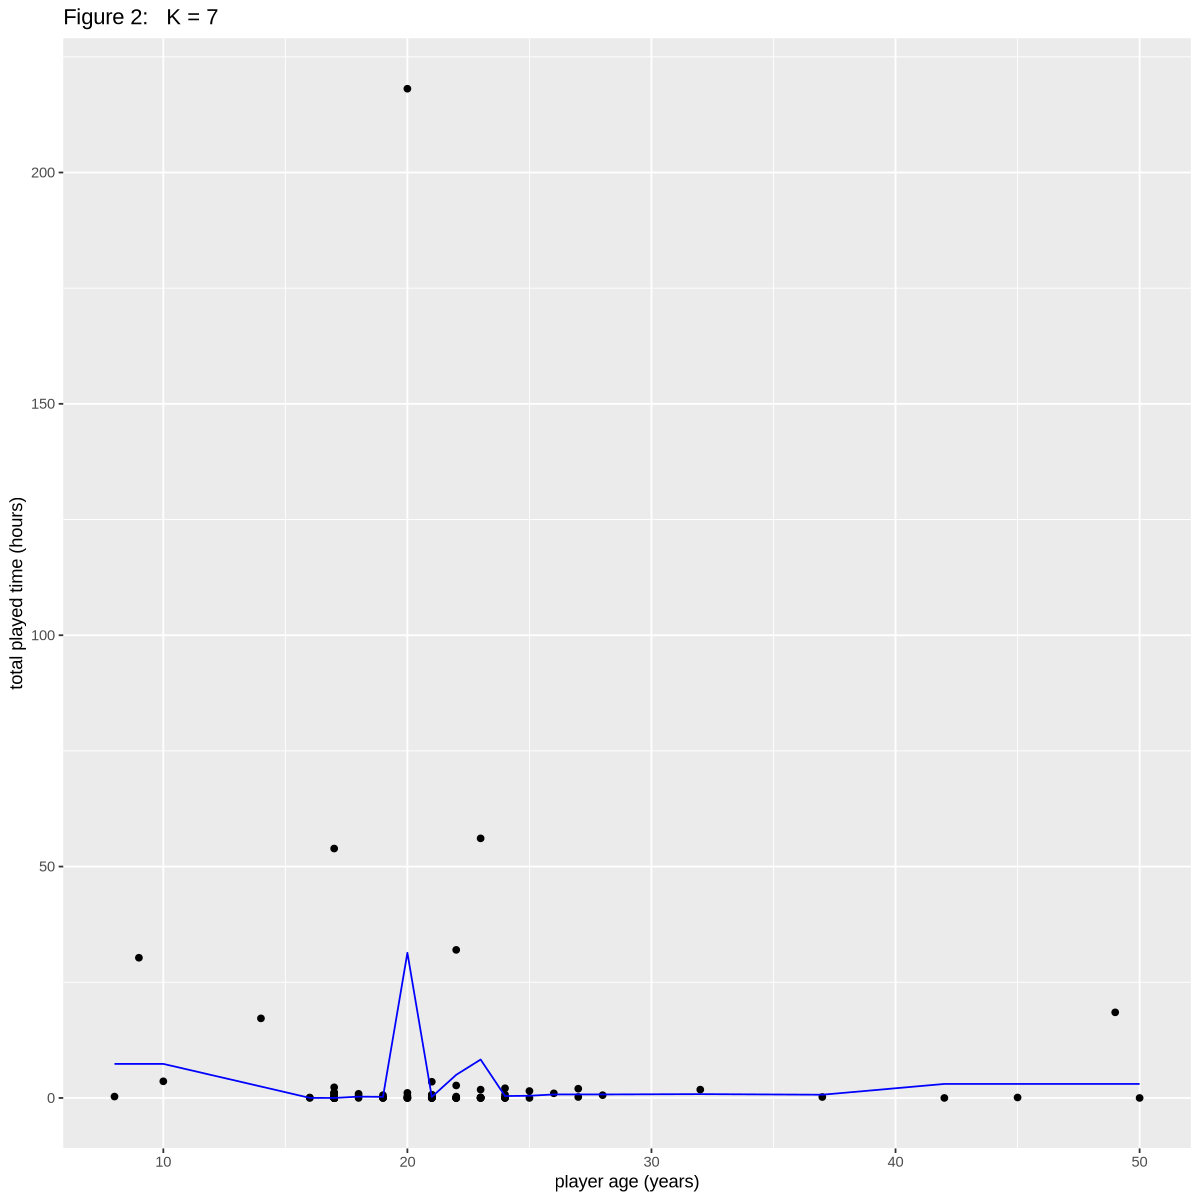

In [39]:
options(repr.plot.width=10, repr.plot.height = 10)

players_preds <- players_best_fit |>
  predict(players_training) |>
  bind_cols(players_training)

players_plot <- ggplot(players_preds, aes(x = age, y = played_hours)) +
  geom_point() +
  geom_line(data = players_preds,
            mapping = aes(x = age, y = .pred),
            color = "blue") +
  xlab("player age (years)") +
  ylab("total played time (hours)") +
  ggtitle(paste0("Figure 2:   K = ", k_min))

players_plot


### Discussion:

The visualization of our regression model (Figure 2) shows us that players in their early 20s are most likely to play most, about 30 hours, and contribute more hours of data. All other ages have relatively basal levels of hours played. This leads us to advise the plaicraft group to target people in their early 20s to play their game.
<p>
From the line graph of player ages vs average played hours (Figure 1) we hypothesized that players in their late teens or children would play the most hours since they had the highest average played hours in general. The result found from the regression model found that people in their early 20s are most likely to contribute the most hours. This result differs a bit from our hypothesis and the reason for this might be related to the amount of data available for various ages. Being run on UBC campus, it is likely that undergraduate and graduate students who are mostly in their early 20s were the most common participants, so the spike in the amount of data in their age group may have affected the regression model. <p>

The model suggests that people in their early 20s should be targeted by the Plaicraft team, but since the RMSPE for the training set from cross validation is about 19.5, we can predict played hours for players within 19.5 hours. This is a large range, but it still gives the team an idea for what their target demographic should be. That being said, since the RMSPE between the cross validation and the testing set is very different (19.5 vs. 34.5) the model is not very reliable for making predictions. We advise the team to take our suggestion of aiming for people in their early 20s with a grain of salt. The large difference in the RMSPE shows how the model is not translated well between seen and unseen data. <p>

Our model shows that age alone should not be used as a predictor for played hours for players. Maybe other factors like experience can yield more accurate and useful predictions so that the team can gather as much data as possible.


### References